# <font color=#EEAA11> HW 03: Visualization, IDA and EDA </font>


![missing](https://jenslaufer.com/figure/source/2019-02-05-visualize_missing_values_with_ggplot/unnamed-chunk-13-1.png)


### Instructions for Submitting Names in Notebooks

Please follow the format below when typing your names in the notebook. 

- Each member's name must be written in the format:  
  **Last Name, First Name, Second Name**

#### Example:
    Poe, Edgar Allan

> ⚠️ **Failure to follow this format will result in a reduction of your grade.**


Toaz, Benjamin Ryan


## <font color=#00BBFF> Problem #1 - IDA (10 pts) </font>

In this problem you are going to explore IDA: Initial Data Analysis, which is can be defined many ways, but we will assume it contains these steps:
* Data collection and importation
* Data cleaning and preprocessing
* Variable identification and classification
* Basic descriptive statistics
* Data quality assessment
* Missing data analysis
* Outlier detection

🤓 Follow these steps:
* import the planets dataset, which is in Seaborn
    - in this case, the data has been collected for us and you simply need to import it into a Pandas dataframe
* based on your initial assessment of this dataset, how should it be cleaned and processed? discuss your observations in a markdown cell and write the code to complete this task
* what types of variables are there? ordinal? categorical? cardinal? add this to your discussion in the markdown cell
* find the statistics of the different features of the data; what simple methods are in Pandas are there for this? are there variables for which this doesn't make sense? do any of them need to be encoded? 
* based on what you see so far, what is the quality of this data? basic IDA for this might include using `.describe` and `.info` 
* did you note any missing data? make a heat map of this dataset that shows missing values (I have given an example code for this in the past, but feel free to write your own); 
* for each feature/column for which it makes sense, scale the column using the z-score and print the number of outliers for that column (that is, how many rows in the column have values $<-3$ or $>3$ after scaling?)



These IDA steps have already revealed important properties of this dataset. You will want to follow these steps for your project and document what you found. A nice feature of a web app is to have a tab, perhaps called "Dataset(s)", that describes the dataset(s) used for the app. 
____

Next, let's examine EDA, which follows the IDA steps. Let's summarize IDA in a table and compare to EDA:

| Phase | Step | Key Activities |
|-------|------|----------------|
| IDA | 1. Data collection and importation | - Gather data from various sources<br>- Import data into analysis environment (e.g., Python, R) |
| IDA | 2. Data cleaning and preprocessing | - Handle missing values<br>- Remove duplicates<br>- Correct data types<br>- Standardize formats |
| IDA | 3. Variable identification and classification | - Identify dependent and independent variables<br>- Classify variables (numeric, categorical, etc.)<br>- Understand the meaning of each variable |
| IDA | 4. Basic descriptive statistics | - Calculate mean, median, mode<br>- Determine range, variance, standard deviation<br>- Identify minimum and maximum values |
| IDA | 5. Data quality assessment | - Check for inconsistencies<br>- Verify data accuracy<br>- Assess data completeness |
| IDA | 6. Missing data analysis | - Quantify missing data<br>- Identify patterns in missing data<br>- Decide on imputation strategy if necessary |
| IDA | 7. Outlier detection | - Identify potential outliers<br>- Assess impact of outliers<br>- Decide on treatment of outliers |
| EDA | 1. Univariate analysis | - Create histograms, box plots for numeric variables<br>- Generate bar charts for categorical variables<br>- Calculate summary statistics |
| EDA | 2. Bivariate analysis | - Create scatter plots<br>- Perform cross-tabulations<br>- Calculate correlations between pairs of variables |
| EDA | 3. Multivariate analysis | - Use dimensionality reduction techniques (e.g., PCA)<br>- Create pair plots or correlation matrices<br>- Explore interactions between multiple variables |
| EDA | 4. Correlation analysis | - Calculate correlation coefficients<br>- Create correlation heatmaps<br>- Identify strongly correlated variables |
| EDA | 5. Dimensionality assessment | - Evaluate number of features vs. observations<br>- Consider feature selection or extraction methods<br>- Assess impact of high dimensionality on analysis |
| EDA | 6. Pattern and trend identification | - Look for temporal trends in time series data<br>- Identify seasonal patterns<br>- Detect clusters or groupings in the data |
| EDA | 7. Hypothesis generation | - Formulate potential relationships between variables<br>- Develop questions for further investigation<br>- Identify areas for more detailed statistical analysis |

Note: The boundary between IDA and EDA can be fluid, and some activities may overlap or be performed iteratively throughout the analysis process.

In [1]:
# * import the planets dataset, which is in Seaborn
#     - in this case, the data has been collected for us and you simply need to import it into a Pandas dataframe

import seaborn as sns
df = sns.load_dataset("planets")
df

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [2]:
# * based on your initial assessment of this dataset, how should it be cleaned and processed? discuss your observations in a markdown cell and write the code to complete this task
# * what types of variables are there? ordinal? categorical? cardinal? add this to your discussion in the markdown cell
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['method'] = le.fit_transform(df['method'])

print(le.classes_)
df

['Astrometry' 'Eclipse Timing Variations' 'Imaging' 'Microlensing'
 'Orbital Brightness Modulation' 'Pulsar Timing'
 'Pulsation Timing Variations' 'Radial Velocity' 'Transit'
 'Transit Timing Variations']


,method,number,orbital_period,mass,distance,year
0,7,1,269.300000,7.10,77.40,2006
1,7,1,874.774000,2.21,56.95,2008
2,7,1,763.000000,2.60,19.84,2011
3,7,1,326.030000,19.40,110.62,2007
4,7,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,8,1,3.941507,NaN,172.00,2006
1031,8,1,2.615864,NaN,148.00,2007
1032,8,1,3.191524,NaN,174.00,2007
1033,8,1,4.125083,NaN,293.00,2008


The data itself doesn't requre too much cleaning since it is mostly numerical data. The categorical method feature should be encoded using the ordinal encoder, but this is the only cleaning that is needed. The missing values should be imputed, but I will wait to do this since it hasn't been covered yet.

In [3]:
# * find the statistics of the different features of the data; what simple methods are in Pandas are there for this? are there variables for which this doesn't make sense? do any of them need to be encoded? 
df.describe()

,method,number,orbital_period,mass,distance,year
count,1035.000000,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,7.033816,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.458589,1.240976,26014.728304,3.818617,733.116493,3.972567
min,0.000000,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,7.000000,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,7.000000,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,8.000000,2.000000,526.005000,3.040000,178.500000,2012.000000
max,9.000000,7.000000,730000.000000,25.000000,8500.000000,2014.000000


The method feature is categorical, so the mean and standard divaiation make less sense here.

In [4]:
# * based on what you see so far, what is the quality of this data? basic IDA for this might include using `.describe` and `.info` 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   int64  
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 48.6 KB


There are a significant number of missing values in this dataset, so the overall quality is poor. Granted, measuring celestial bodies is tricky and expensive business.

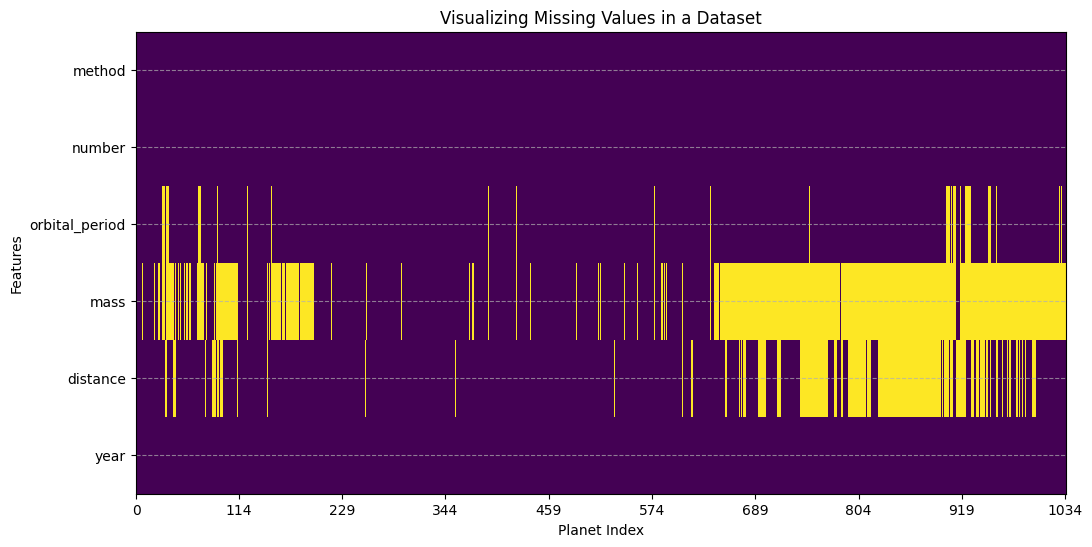

In [5]:
# * did you note any missing data? make a heat map of this dataset that shows missing values (I have given an example code for this in the past, but feel free to write your own); 

import numpy as np
import matplotlib.pyplot as plt

nan_mask = df.isna()

# convert boolean mask to integer (False becomes 0, True becomes 1)
nan_array = nan_mask.astype(int).to_numpy()

# size the plot
plt.figure(figsize=(12, 6))

# imshow with interpolation set to 'nearest' and aspect to 'auto'
im = plt.imshow(nan_array.T, interpolation='nearest', aspect='auto', cmap='viridis')

plt.xlabel('Planet Index')
plt.ylabel('Features')
plt.title('Visualizing Missing Values in a Dataset')

# y-axis tick labels to feature names
plt.yticks(range(len(df.columns)), df.columns)

# x-axis ticks
num_planets = nan_array.shape[0]
plt.xticks(np.linspace(0, num_planets-1, min(10, num_planets)).astype(int))

plt.grid(True, axis='y', linestyle='--', alpha=0.7)


In [6]:
# * for each feature/column for which it makes sense, scale the column using the z-score and print the number of outliers for that column (that is, how many rows in the column have values $<-3$ or $>3$ after scaling?)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().set_output(transform="pandas")
df_scaled = scaler.fit_transform(df)

# Generated by Copilot, VS Code Extension, 9-17-25
for col in df_scaled.columns:
    if np.issubdtype(df_scaled[col].dtype, np.number):
        num_outliers = ((df_scaled[col] < -3) | (df_scaled[col] > 3)).sum()
        print(f"Column '{col}' has {num_outliers} outliers.")

Column 'method' has 49 outliers.
Column 'number' has 31 outliers.
Column 'orbital_period' has 3 outliers.
Column 'mass' has 14 outliers.
Column 'distance' has 13 outliers.
Column 'year' has 12 outliers.


Again we ignore the method feature for the outliers.

____

## <font color=#00BBFF> Problem #2 - Exploratory Data Analysis (10 pts) </font>

In this problem you are going to explore EDA: Exploratory Data Analysis, which - _like IDA_ - is can be defined many ways, but we will assume it contains these steps:
* Univariate analysis
* Bivariate analysis
* Multivariate analysis
* Correlation analysis
* Dimensionality assessment
* Pattern and trend identification
* Hypothesis generation

Note that IDA did not involve much in the way of visualization; EDA relies heavily on visualization. An important aspect of EDA is that is, as in the name, exploratory. The goals of EDA might be:
* you have a unique dataset and you want to explore whether it contains anything that would be useful or surprising.
* you have a very specific goal in mind already and you want to explore whether this dataset can help you achieve your goal. 

Because this is EDA, with an emphasis on the E, I want you to explore this dataset with little guidance. Use your curiosity, intuition and creativity. 

🤓 Follow these steps:
* only use the Plotly library for this problem, with as many plot types as you can; interactive plots are preferred
* make about one plot per category above - if you are not familiar with a concept, skip that item (e.g., you don't know what PCA is, you have no idea how to do clustering, there are temporal trends, or whatever); shoot for about 5 plots
* but, complete 7: the EDA must lead to something to do next!! use a markdown cell for this
 

In [7]:
# Univariate analysis
import plotly.express as px

fig = px.histogram(df, x='distance', nbins=100, title='Planet Distances')
fig.show()

In [8]:
# * Bivariate analysis

fig = px.scatter(df, x='orbital_period', y='mass', color='number', title='Orbit vs Mass by Planet Number')
fig.update_layout(
    xaxis=dict(range=[0, 7000]), 
)
fig.show()

In [9]:
# * Multivariate analysis - https://plotly.com/python/pca-visualization/

import plotly.express as px
from sklearn.decomposition import PCA

pca = PCA()
numeric_cols = df.select_dtypes(include='number').columns
df_clean = df[numeric_cols].dropna()

components = pca.fit_transform(df_clean)
labels = {
    str(i): f"PC {i+1} ({var:.3f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(3),
    color=df.loc[df_clean.index, "number"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [10]:
# * Correlation analysis -https://stackoverflow.com/questions/66572672/correlation-heatmap-in-plotly

# Correlation
df_corr = df.corr().round(2)  
# Mask to matrix
mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Viz
df_corr_viz = df_corr.mask(mask).dropna(how='all').dropna(axis='columns', how='all')
# df_corr_viz = df_corr.mask(mask).dropna(how='all').dropna(how='all')

fig = px.imshow(df_corr_viz, text_auto=True)
fig.show()


In [11]:
# * Dimensionality assessment - https://plotly.com/python/parallel-coordinates-plot/

fig = px.parallel_coordinates(df, color="number",
                              dimensions=['orbital_period', 'mass', 'distance', 'year', 'method'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)
fig.show()

**Hypothesis Generation**

One of the highest correlations is between orbital period and the method used for observing the planet. I think that we can use this data to make profiles for the types of planets that are best analyzed by each of the techniques used in the dataset.

____

## <font color=#00BBFF>  Problem #3 - Projects (10 points) </font>

It is time to start working on your project!

Read the instructions on projects given in D2L and Teams so that you are very familiar with the plan. As always, please contact us on Teams with any questions that arise!

In a cell below, write your current ideas for your project. I would like this to come from you on a topic what is of interest to you. Answer these questions:
* what topics are you interested in?
* do you already have a dataset you want to work with?
* if not, explore datasets online to see if you can find several that might work
    - as we have seen, there are datasets in some of the standard Python libraries (e.g., Seaborn, sklearn, Pandas), but there are also repos like [this one](https://archive.ics.uci.edu)
* identify a definite dataset you want to work with for the next few weeks - you will be able to change it; in fact, you might find it can't do what you hope and you will have to change it
* discuss the dataset(s) you found and what you think they can do for you: it is important that there is a narrative, a purpose, a story
* from what you know today, what visualizations and interactive elements might you use in your app?

Give as many details as you can. And, if you have any concerns, discuss those as well. We need to think about risk mitigation because in data science we don't always have the data we wish we did. 



 **Answer**
 
 I am interested in robotics and autonomous vehicles. I have a couple datasets that I have generated as part of my research work, but I am going to try to use them to publish a paper. It might be double dipping to also use them for coursework. I found a few promising alternatives on the UC Irvine repo:

 - https://archive.ics.uci.edu/dataset/963/ur3+cobotops
 - https://archive.ics.uci.edu/dataset/466/gnfuv+unmanned+surface+vehicles+sensor+data+set+2 
 - https://archive.ics.uci.edu/dataset/135/pioneer+1+mobile+robot+data

 The first one looks the most promising. It is the logs for a cobot operating at some task with a human. Position and other robot state information is included, as well as whether it stopped because the robot lost its grip or because the human got in the way. There is a clear narrative in that this data could be used to forcast what actions will lead to failures and avoid them proactively. I can potetially visualize the position of the robot during failures in a schematic type diagram, or the riskiest states in a heatmap. I could also have a gui that allows people to move the robot, then have a model that throws faults with a similar probabiliity as would be experienced in an actual manufacturing scenario.

____

## <font color=#00BBFF>  Problem #4 - Chapter 3 (10 points) </font>

Read Chapter 3 in your textbook. In a markdown cell, summarize your favorite story told in the chapter and discuss why it clearly illustrates the notion of causality to you. 

Next, go to [this webpage](https://www.tylervigen.com/spurious-correlations). Find the page **Discover a correlation** and scroll down to find a topic of interest to you; for example, **Google searches**. Click on one and then find something below it to correlate it with. Create the funniest pairing you can and write a short paragraph to make it seem real. There will be a channel on Teams, Spurious Correlation, where you can post your result, if you wish. Put the paragraph first, and then the plot that "proves" your hypothesis. 

Here is an example:


#### Pychological Effects of Margarine

Margarine consumption causes couples to move further apart. We suspect that the slick, oily texture of margarine has a psychological effect, subtly eroding the bonds of marriage over time because meals have drifted away from slow and healthy meals to quick meals alone.

Some psychologists even theorize that margarine, being a processed substitute for butter, symbolizes a deeper discontent in the lives of those who consume it—perhaps a reflection of emotional substitutes in relationships. The message is clear: _If you love your spouse, stay away from margarine!_

With this discovery, today we are launching a public health campaign: "**Save Your Marriage, Skip the Margarine**." Margarine joins the ranks of other known relationship stressors like long commutes, financial woes, and reality TV shows.

You’ve heard the facts:  here's the data: 



![marg](https://tylervigen.com/spurious/correlation/image/5920_per-capita-consumption-of-margarine_correlates-with_the-divorce-rate-in-maine.svg)

**Answer**

If the coauthors should both kill their swarn enemy at the same time, they can technically claim that neither of their actions caused the death of their enemy. Since it would have happended anyway if one of them had decided not to attack the enemy, they can argue that neither of them were to blame. This is a logical loophole in the counterfactual approach to deciding causality, because common sense says they are both guilty of murder, but from the perspective of the counterfactual world the outcome is the same and no one is responsible. Even in this simple case, causality is a slippery concept.

New data shows that the increase in UFO sightings in Connecticut has driven exponential growth in the number of successful Mount Everest climbs over a 35 year period. Roughly 8.55 climbs per sighting is a strong relationship between these two phenomenon. This data goes a long way towards determining why so many attempts to reach the summit fail. The primary reason is that beyond a certain threshold of 8.55 climbs per sighting on average per year, the UFO ratio has reached saturation and climbing Mount Everest is no longer possible. In order to give more people a chance to achieve this important milestone in their mountaineering careers, $5 billion in federal funding has been allocated in order to increase UFO surveillance capabilities in New England. 

![color](https://www.tylervigen.com/spurious/correlation/image/1891_ufo-sightings-in-connecticut_correlates-with_total-number-of-successful-mount-everest-climbs.png)

____

![color](https://miro.medium.com/v2/resize:fit:800/0*-t4uEHHRgeJ8w-wx.png))

## <font color=#00BBFF> Problem #5 Understanding Color (0 pts) </font>

This problem does not have any points. It is for your own personal curiosity. Watch this video. 



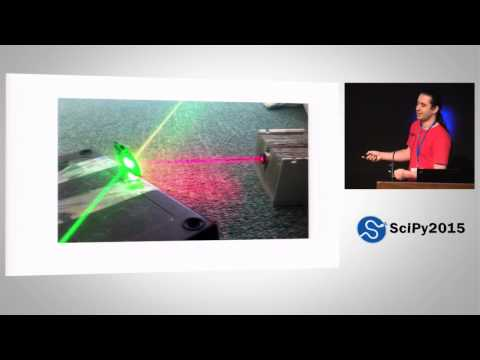

In [12]:
from IPython.display import YouTubeVideo
video_id = "xAoljeRJ3lU"
YouTubeVideo(video_id, width=560, height=315)

---
## Congratulations, you're done!

### 🛑 IMPORTANT: Before Submission

**STOP!** Before submitting your notebook, please follow these steps:

### Step 1: Restart Your Kernel

**Jupyter Notebook (Classic):**
- Go to `Kernel` → `Restart & Clear Output`

**JupyterLab:**
- Go to `Kernel` → `Restart Kernel and Clear All Outputs...`

**VS Code:**
- Open Command Palette (`Ctrl+Shift+P` / `Cmd+Shift+P`)
- Type "Jupyter: Restart" and select `Jupyter: Restart`
- Then select `Clear All Output`

**PyCharm:**
- Go to `Run` → `Restart Kernel` (or click the restart button in the toolbar)
- Go to `Cell` → `All Output` → `Clear`

### Step 2: Run All Cells

**Jupyter Notebook (Classic):**
- Go to `Cell` → `Run All`

**JupyterLab:**
- Go to `Run` → `Run All Cells`

**VS Code:**
- Open Command Palette (`Ctrl+Shift+P` / `Cmd+Shift+P`)
- Type "Jupyter: Run All" and select `Jupyter: Run All Cells`

**PyCharm:**
- Go to `Cell` → `Run All` (or use `Ctrl+Shift+F10` / `Cmd+Shift+R`)

### Step 3: Verify Everything Works

Check that all cells execute without errors and produce the expected output

This ensures that your notebook will run correctly when graded and that you haven't missed any dependencies or variable definitions that might exist only in your current session.

*Your submission will be tested in a fresh environment, so this step is crucial for full credit!*


### Step 4: Submit 
Submit this assignment by uploading your notebook to the course Desire2Learn web page.  Go to the "Homework" folder, find the appropriate submission link, and upload everything there. Make sure your name is on it!


&#169; Copyright 2025, Department of Computational Mathematics, Science and Engineering at Michigan State University.